## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Нам предстоит работать с данными, опубликованными на портале открытых данных Министерства культуры.

**Целью** исследования является изучение рынка российского кинопроката. 

**В ходе** исследования мы
- проведем анализ данных,
- выявим текущие тренды,
- установим заинтересованность зрителей в фильмах с государственной поддержкой. 

Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

**Этапы работы:**
1. Сбор данных - выгрузим необходимые библиотеки данных по работе с данными и их визуализацией и изучим общую информацию в исходных таблицах;
2. Предобработка данных - проведем подготовку выгруженных данных, проверим их тип, наличие пропущенных значений и выбросов, продублированных строк;
3. Анализ - на основе уже обработанных данных проведем статистические рассчеты и подготовим заключения по влиянию различных факторов на сборы в прокате.
4. Сформулировать общий вывод и описать полученные результаты проведенного исследования.

Импортируем необходимые библиотеки (pandas и matplotlib.pyplot) для последующей работы с данными. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)

Загрузили данные из первого csv-файла c помощью библиотеки pandas. 

В этом датасете содержится информация из реестра прокатных удостоверений, включающая производственные характеристики фильмов, рейтинг и степень государственной поддержки.

In [2]:
movies_data = pd.read_csv('/datasets/mkrf_movies.csv') 
movies_data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Загрузили данные из второго csv-файла c помощью библиотеки pandas.

В этом датасете содержатся сведения о показах фильмов в российских кинотеатрах (номер прокатного удостоверения и сборы в рублях).

In [3]:
release_data = pd.read_csv('/datasets/mkrf_shows.csv') 
release_data.head(5)

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


Теперь нам нужно объединить две эти таблицы в один датафрейм. По описанию мы видим, что в этих таблицах есть одинаковый столбец uNumber - номер прокатного удостоверения. Однако, в первой таблице он имеет строковый тип данных, а во второй таблице целочисленный. Если мы хотим объединить эти таблицы по данному столбцу, то он должен быть одного типа в обоих случаях.

In [4]:
movies_data.info()
release_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

При попытке перевести тип данных столбца puNumber в таблице movies_data из object в int возникает ошибка: ValueError: invalid literal for int() with base 10: 'нет'. Это значит, что данные содержат символы, отличные от цифр, а именно вместо пропущенных прокатных удостоверений со значением NaN мы имеем строки с 'нет'. Это у нас одна единственная 1797ая строка. 

In [5]:
#movies_data['puNumber'] = movies_data['puNumber'].astype('int')
#movies_data.info()

In [6]:
# Эта строка попортила нам всю малину, сейчас с ней как разберемся..

movies_data.loc[movies_data.loc[:,'puNumber']== 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Мы можем методом replace() в ней заменить нецифровые символы на значением '0'. Тогда у нас получится исправить весь столбец на тип данных int.

In [7]:
movies_data['puNumber'] = movies_data['puNumber'].replace('нет', '0')

In [8]:
movies_data['puNumber'] = movies_data['puNumber'].astype('int')
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Ради интереса можно проверить, сколько одинаковых строк в столбце puNumber и в первой, и во второй таблицах. Как видим, все 3158 строк из исходной таблицы ru_release встречаются в таблице movies_data.

In [95]:
print(release_data['puNumber'].isin(movies_data['puNumber']).sum())
print((movies_data['puNumber'].isin(release_data['puNumber']).head(10)))

3158
0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: puNumber, dtype: bool


Сейчас мы сможем объединить таблицы по этому столбцу. Нам необходимо, чтобы все объекты из датасета movies_data обязательно вошли в получившийся датафрейм. Для этого мы можем воспользоваться методом merge() c параметром on = 'left'.

In [10]:
ru_release = movies_data.merge(release_data, on='puNumber', how = 'left')
ru_release.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Таким образом** мы выполнили первый этап работы по сбору первичных данных. 

Для этого мы:
1. загрузили исходные таблицы и нашли у них одинаковый столбец,
2. в столбце со строковой записью номеров удостоверений из таблицы movies_data выявили запись, которая нам мешала привести тип данных из object в int64,
3. заменили нечисловое значение на ближайшее по смыслу числовое ('нет' в '0'),
4. объединили две исходные таблицы по столбцу с номерами прокатных удостоверений

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Приступаем ко второму этапу работы - предобработке данных.

Методом info() снова выведем общую информацию о таблице.

In [11]:
ru_release.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Все столбцы имеют соответствующий тип данных, кроме:
- **show_start_date** - *строковый формат будем менять на формат даты*;
- **ratings** - *строковый тип данных поменяем на вещественное число*;

- **Столбец show_start_date**

Методом to_datetime() превратим строковое содержимое этого столбца в даты. Далее для работы нам потребуется год проката, но для этого мы создадим отдельный столбец, поэтому количество символов в этом столбце для нас не особо важно, главное, что из строкового значения мы выделили день, месяц и год.

In [12]:
ru_release['show_start_date'] = pd.to_datetime(ru_release['show_start_date'], format ='%Y-%m-%d %H:%M')
ru_release['show_start_date'].head(10)

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
5   2016-09-13 12:00:00+00:00
6   2013-10-18 12:00:00+00:00
7   2014-12-29 12:00:00+00:00
8   2016-05-05 12:00:00+00:00
9   2014-12-01 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

- **Столбец ratings**

Воспользуемся методом .astype('float64'), чтобы преобразовать строку в вещественное число.

In [13]:
#ru_release['ratings'] = ru_release['ratings'].astype('float64')
#ru_release['ratings'].head(10) 

Произошла ошибка ValueError: could not convert string to float: '99%'. А вдруг у наст помимо '99%' имеется еще какие-то подозрительные рейтинги, посмотрим на уникальные значения методом unique().

In [96]:
print(ru_release['ratings'].unique())

[7.2 6.6 6.8 7.7 8.3 8.  7.8 8.1 7.1 6.  7.4 5.8 8.7 6.3 6.9 5.  4.3 7.3
 7.  6.4 nan 8.2 7.5 6.7 7.9 5.9 6.2 5.6 6.5 2.4 7.6 6.1 8.6 8.5 8.8 5.5
 5.1 5.7 5.4 9.9 4.4 4.5 5.3 4.1 8.4 2.6 3.8 4.6 4.8 4.  3.  1.6 4.2 5.2
 4.7 4.9 3.9 2.7 3.3 2.9 2.8 3.7 1.4 3.1 9.7 3.5 3.2 1.5 2.1 2.5 9.2 3.4
 1.1 3.6 9.1 9.4 9.  1.9 1.  8.9 1.3 1.8 1.2 1.7 9.8]


Теперь мы выяснили, что у нас в столбце с оценками всплыли рейтинги по 100% системе как на Rotten Tomatoes.  Но тут вам не там, и нам нужно анализировать оценки КиноПоиска (а они по 10 балльной системе). 

Можно было бы создадать функцию, с помощью которой переведем эти вот проценты в 10 балльную систему, но у нас строковый тип данных, а такие операции как * или / с ними не работают. Что ж, будем править ручками.

In [15]:
ru_release['ratings'] = ru_release['ratings'].replace('97%', '9.7')
ru_release['ratings'] = ru_release['ratings'].replace('19%', '1.9')
ru_release['ratings'] = ru_release['ratings'].replace('88%', '8.8')
ru_release['ratings'] = ru_release['ratings'].replace('98%', '9.8')
ru_release['ratings'] = ru_release['ratings'].replace('99%', '9.9')
ru_release['ratings'] = ru_release['ratings'].replace('83%', '8.3')
ru_release['ratings'] = ru_release['ratings'].replace('64%', '6.4')
ru_release['ratings'] = ru_release['ratings'].replace('89%', '8.9')
ru_release['ratings'] = ru_release['ratings'].replace('91%', '9.1')
ru_release['ratings'] = ru_release['ratings'].replace('28%', '2.8')
ru_release['ratings'] = ru_release['ratings'].replace('94%', '9.4')
ru_release['ratings'] = ru_release['ratings'].replace('62%', '6.2')
ru_release['ratings'] = ru_release['ratings'].replace('79%', '7.9')
ru_release['ratings'] = ru_release['ratings'].replace('90%', '9.0')

In [97]:
print(ru_release['ratings'].unique())

[7.2 6.6 6.8 7.7 8.3 8.  7.8 8.1 7.1 6.  7.4 5.8 8.7 6.3 6.9 5.  4.3 7.3
 7.  6.4 nan 8.2 7.5 6.7 7.9 5.9 6.2 5.6 6.5 2.4 7.6 6.1 8.6 8.5 8.8 5.5
 5.1 5.7 5.4 9.9 4.4 4.5 5.3 4.1 8.4 2.6 3.8 4.6 4.8 4.  3.  1.6 4.2 5.2
 4.7 4.9 3.9 2.7 3.3 2.9 2.8 3.7 1.4 3.1 9.7 3.5 3.2 1.5 2.1 2.5 9.2 3.4
 1.1 3.6 9.1 9.4 9.  1.9 1.  8.9 1.3 1.8 1.2 1.7 9.8]


Ну уж теперь-то тип данных должен поменяться. Сongratulations!

In [17]:
ru_release['ratings'] = ru_release['ratings'].astype('float64')
ru_release['ratings'].head(10) 

0   7.20
1   6.60
2   6.80
3   6.80
4   6.80
5   7.70
6   8.30
7   6.60
8   8.00
9   7.80
Name: ratings, dtype: float64

**Таким образом**, на этом шаге мы изучили типы данных в нашем датафрейме:

1. вывели информацию о типе данных каждого столбца,
2. в столбце show_start_date изменили строковый формат на формат даты,
3. в столбце ratings со строковой записью 10 балльного рейтинга КиноПоиска нашли несоответствующие оценки (например, '64%' и '99%') и заменили эти проценты на аналогичные, но по 10 балльной системе,
4. поменяли в столбце ratings строковые данные на вещественные.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Перед обработкой пропусков сделаем контроль размера датасета до и после обработки.

In [98]:
temp = ru_release.copy() # создаем копию датасета до преобразования
len(temp)

7442

Информацию о исходном количестве строк, столбцов и пропусках можно посмотреть матодом info(). В нашей таблице 7486 строк.

In [99]:
ru_release.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7442 entries, 0 to 7485
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   title                      7442 non-null   object             
 1   puNumber                   7442 non-null   int64              
 2   show_start_date            7442 non-null   datetime64[ns, UTC]
 3   type                       7442 non-null   object             
 4   film_studio                7442 non-null   object             
 5   production_country         7442 non-null   object             
 6   director                   7442 non-null   object             
 7   producer                   6878 non-null   object             
 8   age_restriction            7442 non-null   object             
 9   refundable_support         315 non-null    float64            
 10  nonrefundable_support      315 non-null    float64            
 11  budg

Приступаем ко второму шагу предобработки данных - работой над пропусками.

Оценим процент пропущенных значений. Благодаря цветному оформлению сразу видны столбцы с максимальным количеством пропущенных значений - refundable_support (96%), nonrefundable_support (96%), budget (96%), financing_source (96%) и box_office (58%).

In [20]:
pd.DataFrame(round(ru_release.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


Как мы уже знаем, днные в столбце budget указаны только для тех фильмов, которые получили государственную поддержку. 

**Мы можем предположить**, что только 4% от всех фильмов получили господдержку на производство, а 42% фильмов могли вообще не показываться в российских кинотеатрах, поскольку у них нет кассовых сборов.

In [21]:
ru_release.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

- **Столбцы film_studio, production_country, director**

В этих столбцах у нас в общей сумме 29 пропущенных строк - менее 1% пропусков, так что мы можем удалить эти строки.

In [22]:
ru_release.dropna(subset = ['film_studio'], inplace = True)
ru_release.dropna(subset = ['production_country'], inplace = True)
ru_release.dropna(subset = ['director'], inplace = True)
ru_release.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  564
age_restriction             0
refundable_support       7127
nonrefundable_support    7127
budget                   7127
financing_source         7127
ratings                   948
genres                    957
box_office               4304
dtype: int64

- **Столбцы producer, ratings, genres**

Столбец с рейтингом заполнять средним или медианой не имеет смысла, поскольку тогда это не будет соответствовать реальности (возможно, у фильмов с пропущенной оценкой на самом деле было 10.0, а после заполнения станет 5.3). 

В отличие от имен режиссеров, имена продюссеров не всегда придают фильму условной ценности, заполнять этот столбец тоже не имеет большого смысла.

Чтобы заполнить значение жанра можно попробовать поискать фильмы-продолжения или фильмы-приквелы тех, которые остались с пропусками (потому что, допустим, 2 и 3 части 'Дневник Бриджет Джонс' навряд ли поменяют свой жанр на боевик или ужасы). Или если у фильма есть, например, 2 прокатных удостоверения и во втором из них нет жанра, то можно туда записать жанр из первого.

Таккже можно заполнить строки с жанрами значением 'unknown'.

Удалять строки с пропущенными значениями в этих столбцах мы не будем, поскольку тогда потеряем более 30% исходных данных, а это непозволительная роскошь для датафрейма с 7500 строками.

In [23]:
ru_release['genres'] = ru_release['genres'].fillna('unknown')

- **Столбцы refundable_support, nonrefundable_support, budget, financing_source, box_office**

В столбце budget пропуски подтверждают собой факт отсутствия государственной поддержки. Можно с уверенностью в 100% заменить их значением 0. 

В столбце источник госфинансирования тип данных строковый, поэтому пропуски  можно заполнить значением 'нет'.

В столбце с кассовыми сборами и объёмами средств государственной поддержки пропуски можно было бы заменить на 0. ОДНАКО, в этих строках слишком много пропущенных значений, и позднее все эти столбцы нам понадобятся для исследований. К тому же необязательно, что все 7127 строк будут одинаково пропущены в перечисленных выще столбцах. 

В случае, если мы заполним эти пропуски нулями, то на графиках и гистограммах будет виден слишком выделяющийся пик у этих значений. Пока что оставим пропуски.

In [24]:
#ru_release['refundable_support'] = ru_release['refundable_support'].fillna(0)
#ru_release['nonrefundable_support'] = ru_release['nonrefundable_support'].fillna(0)
#ru_release['box_office'] = ru_release['box_office'].fillna(0)

ru_release['budget'] = ru_release['budget'].fillna(0)
ru_release['financing_source'] = ru_release['financing_source'].fillna('нет')
ru_release.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  564
age_restriction             0
refundable_support       7127
nonrefundable_support    7127
budget                      0
financing_source            0
ratings                   948
genres                      0
box_office               4304
dtype: int64

**Таким образом**, на этом шаге мы изучили пропуски в нашем датафрейме:

1. вывели информацию о проценте и количестве пропусков в каждом столбце,
2. в столбцах film_studio, production_country, director удалили пропуски, поскольку таких строк менее 1%,
3. в столбцах producer, ratings, genres решили оставить пропуски, потому что по большей части они не влияют на исследование,
4. в столбцах refundable_support, nonrefundable_support, budget, financing_source, box_office заполнили пропуски 0 и 'нет'.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

- **Явные дубликаты**

Сначала узнаем, есть ли среди всех строк явные дубликаты. Таковых не оказалось, каждая строка уникальна.

In [25]:
ru_release.duplicated().sum()

0

- **Неявные дубликаты**

***1. столбец puNumber***

Теперь узнаем, есть ли дубликаты по номеру прокатного удостоверения 

In [26]:
duplicated_ru_release = ru_release[ru_release['puNumber'].duplicated(keep = False)]
duplicated_ru_release

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,0.00,нет,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,0.00,нет,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,0.00,нет,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,0.00,нет,6.80,"комедия,криминал",NaN


Чтооооо ж... У нас имеется 4 разных фильма, которые попарно имеют одинаковые прокатные удостоверения. По сути на анализ общей таблицы это никак не влияет, однако все равно ничего не понятно, но очень интересно.

Попытав счастья на сайте Минкульта РФ https://culture.gov.ru, я нашла в сервисах Реестр прокатных удостоверений. 

Что можно сказать про прокатное удостоверение: оно может быть кинотеатральным, на кабельную трансляцию, на домашнее использование DVD и VHS или Blu-ray.

И у 'Анализируй это', и у 'Анализируй то' есть последнее выданное удостоверение 221054410, оно у обоих выдано на Blu-ray в один день 25.05.2010. 

То же самое касается другой пары фильмов:'Как жениться и остаться холостым' и 'Иоанна - женщина на папском престоле' - удостоверение 221154310 выдано им даже в один день (17.12.2010), но на видео по запросу (неисключительные права).

А еще возникает вопрос наличия рейтингов на КиноПоиске у фильмов, чьи удостоверения в нашей таблице выданы не на стриминговые платформы и онлайн кинотеатры, а на Blu-ray. Но это уже совсем другая история.

Тем не менее, в таблице использованы не только кинотеатральные прокатные удостоверения, но и для домашнего использования. Возможно, будь в таблице исключительно кинотеатральные лицензии, то строки со сборами были бы заполнены.

**В общем**, дубликаты по номеру прокатного удостоверения у нас в датафрейме есть, но поскольку это данные с сайта Минкульта, то изменить что-то тут мы не можем. На этом наши полномочия всё.

***2. столбцы financing_source и age_restriction***

Посмотрим уникальные значения источников госфинансирования и возрастных категорий. В этих столбцах неявных дубликатов нет.

In [27]:
ru_release['financing_source'].unique()

array(['нет', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [28]:
ru_release['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

***3. столбцы film_studio и producer***

Что касается этих столбцов, то наличие в них неявных дубликатов для нашего исследования не особо важно, поэтому можем оставить эти столбцы без обработки.

***4. столбцы production_country, director и genres***

Далее для исследования нам потребуется создать новые столбцы. После того, как мы создадим новые столбцы с именем и фамилией главного режиссера и основным жанром, можно просмотреть в этих столбцах дубликаты. 

Наличие/отсутствие неявных дубликатов стран нам тоже не понадобится для исследования, оставим как есть. *После основного вывода я ради интереса попробовала посмотреть страны, но там все очень плохо с данными.*

**Причины появления дубликатов**

Среди таких причин можно выявить 
- невнимательное отношение к заполнению полей,
- неверная транскрипция названий кинокомпаний, имен и фамилий зарубежных актеров или членов съемочной группы,
- появление сокращений, знаков препинания или символов в категориях.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

- Во многих категориальных столбцах мы видим множество повторов и дубликатов. По предыдущему пункту уже видно, что в этом столбце режиссеров один и тот же человек может быть записан по-разному (режиссер Гарольд Реймис и ХЭрольд Рэмис). Кстати, в столбце с продюссерами виднеется некий Паул Уэйнстейн, который может воспользоваться своим вторым именем Пола Уейнстейн и скрываться от спецслужб.

- Также, например, в столбце type к появлению продублированного значения типа фильма привело появление пробелов в начале строки.

In [29]:
ru_release['type'] = ru_release['type'].str.lower()
len(ru_release['type'].unique())

8

Художественный фильм у нас есть с пробелом и без него, приведем все типы фильмов к единому виду с помощью метода str.strip().

In [30]:
ru_release['type'] = ru_release['type'].str.strip()
len(ru_release['type'].unique())

6

Для подтверждения нашей гипотезы о том, что не только в столбце type встречались такие значения, проанализируем остальные категориальные столбцы и, если там есть дубликаты, то отредактируем их.

- Изучим, есть ли в названиях студий записи с пробелами или одно и то же название, но записанное в разном регистре.

In [31]:
# 5485 разных наименований
len(ru_release['film_studio'].unique())

5485

In [32]:
ru_release['film_studio'] = ru_release['film_studio'].str.lower()
ru_release['film_studio'] = ru_release['film_studio'].str.strip()
len(ru_release['film_studio'].unique())

# Другое дело, почти на 70 строк меньше дубликатов

5417

- Изучим, есть ли в странах-производителях записи с пробелами и разным регистром.

In [33]:
len(ru_release['production_country'].unique())

950

In [34]:
ru_release['production_country'] = ru_release['production_country'].str.lower()
ru_release['production_country'] = ru_release['production_country'].str.strip()
len(ru_release['production_country'].unique())

# Как оказалось, в странах тоже были 17 таких строк

933

- Изучим, есть ли в жанрах записи с пробелами и разным регистром.

In [35]:
len(ru_release['genres'].unique())

742

In [36]:
ru_release['genres'] = ru_release['genres'].str.lower()
ru_release['genres'] = ru_release['genres'].str.strip()
len(ru_release['genres'].unique())

# Ну хоть в этом столбце все записи были оформлены по-единому виду

742

- Изучим, есть ли в режиссерах записи с пробелами и разным регистром.

In [37]:
len(ru_release['director'].unique())

4796

In [38]:
ru_release['director'] = ru_release['director'].str.lower()
ru_release['director'] = ru_release['director'].str.strip()
len(ru_release['director'].unique())

# 15 строк мы исправили

4781

- Напоследок, зучим, есть ли в продюссерах записи с пробелами и разным регистром.

In [39]:
len(ru_release['producer'].unique())

5330

In [40]:
ru_release['producer'] = ru_release['producer'].str.lower()
ru_release['producer'] = ru_release['producer'].str.strip()
len(ru_release['producer'].unique())

# 23 такие строки

5307

**Таким образом**, на этом шаге мы изучили дубликаты в нашем датафрейме:

1. проверили наличие явных дубликатов в датафрейме, их не обнаружили;
2. далее проверили наличие неявных дубликатов в категориальных столбцах. Выяснили, что в столбцах с типом фильма, студией-производителем, страной-производителем и в столбцах с именами и фамилиями режиссеров и продюссеров встречались строки с написанными в разном регистре и с пробелами дубликаты; 
3. отредактировали неявные дубликаты в этих столбцах.

In [41]:
ru_release.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7459 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7459 non-null   object             
 1   puNumber               7459 non-null   int64              
 2   show_start_date        7459 non-null   datetime64[ns, UTC]
 3   type                   7459 non-null   object             
 4   film_studio            7459 non-null   object             
 5   production_country     7459 non-null   object             
 6   director               7459 non-null   object             
 7   producer               6895 non-null   object             
 8   age_restriction        7459 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 7459 non-null   float64          

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Выведем информацию о таблице.

In [42]:
#ru_release.info()
ru_release.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,459.00",332.00,332.00,"7,459.00","6,511.00","3,155.00"
mean,"135,196,302.22","11,864,457.83","48,980,988.89","5,662,993.15",6.49,"76,551,328.80"
std,"38,388,412.90","24,916,555.26","59,980,117.92","47,612,917.67",1.11,"240,455,853.44"
min,0.00,0.00,0.00,0.00,1.00,0.00
25%,"113,000,116.50",0.00,"25,000,000.00",0.00,5.90,"87,090.50"
50%,"121,015,514.00",0.00,"30,000,000.00",0.00,6.60,"2,338,049.90"
75%,"124,003,265.50","15,000,000.00","40,375,000.00",0.00,7.20,"23,995,460.84"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


Можем предположить, что в таблице встречаются фильмы с возвратными/невозвратными объёмами средств господдержки, но при этом у них нет бюджета.

С подозрительными дубликатами столбца puNumber мы разобрались, остальные количественные столбцы относятся к объему госфинансирования, бюджету и сборам.

Как уже ранее было замечено очень много строк имеют пропуски в этих столбцах, мы уже имеем в виду, что эти фильмы не имеют госфинансирования.

Согласно входным данным budget - общий бюджет фильма. Этот столбец уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таким образом, источник финансирования (financing_source) формирует бюджет фильма (budget), который стостоит из объёма возвратных средств господдержки (refundable_support) и/или невозвратных средств господдержки(nonrefundable_support). 

Соответственно, у фильмов с бюджетом = 0 не может быть априори возвратных или невозвратных средств и источника финансирования.

Или наоборот, наличие ненулевых значений в столбцах refundable_support, nonrefundable_support и financing_source говорит нам о том, что у этого фильма есть бюджет, однако он не внесен в таблицу.

Посмотрим на те строки, где есть и источник господдержки и средства, а вот бюджет нулевой. К сожалению, если мы будем удалять из таблицы строки без бюджета, то потерям много дополнительных данных, важных для дальнейшего исследования. Оставим их, но будем знать, что у нас есть переменная, в которой числятся подозрительные бюджеты.

In [43]:
budget_anomalies = ru_release.query('budget == 0 and financing_source != "нет"')
budget_anomalies

# Можно вывести этот же список такой командой 
#budget_anomalies_2 = ru_release.query('budget < refundable_support + nonrefundable_support')
# budget_anomalies_2

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Эти 17 строк мы можем удалить, потому что это намного меньше 1% данных. После всех манипуляций у нас осталось 7442 строки, то есть 99.5% от исходника :)

In [44]:
ru_release = ru_release.drop(ru_release.query('budget == 0 and financing_source != "нет"').index)

In [45]:
ru_release.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7442 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7442 non-null   object             
 1   puNumber               7442 non-null   int64              
 2   show_start_date        7442 non-null   datetime64[ns, UTC]
 3   type                   7442 non-null   object             
 4   film_studio            7442 non-null   object             
 5   production_country     7442 non-null   object             
 6   director               7442 non-null   object             
 7   producer               6878 non-null   object             
 8   age_restriction        7442 non-null   object             
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 7442 non-null   float64          

**Таким образом**, на этом шаге мы изучили подозрительные данные в количественных столбцах.

Мы обнаружили такие данные, когда при нулевом бюджете у 17 фильмов есть источник госфинансирования (хотя наличие ненулевой записи в этом столбце гарантирует госфинансирование) и удалили эти подозрительные безбюджетные фильмы с гос поддержкой.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

Воспользуемся методом dt.year. Проверим, выведя на экран 10 первых строк по двум нужным нам столбцам.

In [46]:
ru_release['year_of_premiere'] = ru_release['show_start_date'].dt.year
display(ru_release[['show_start_date', 'year_of_premiere']].head(5))

,show_start_date,year_of_premiere
0,2015-11-27 12:00:00+00:00,2015
1,2016-09-13 12:00:00+00:00,2016
2,2016-10-10 12:00:00+00:00,2016
3,2016-06-10 12:00:00+00:00,2016
4,2015-07-29 12:00:00+00:00,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Как мы видели ранее, в таблице столбец с режиссерами заполнены по-разному: у нас есть полные имена и фамилии и первая буква имени и фамилия через точку. Создадим функцию, в которой укажем, что если в строке более есть элементы, разделенных запятой, то нужно вывести только первый такой элемент (а точнее он будет иметь индекс положения 0).

In [47]:
def name_surname (director):
    director = director.split(',')
    if len(director) >= 1:
        return director[0]
    else:
        return

Создадим новый столбец main_director, куда поместим результат выполнения нашей функции.

In [48]:
ru_release['main_director'] = ru_release['director'].apply(name_surname)

Выведем на экран первые 20 строк для проверки.

In [49]:
display(ru_release[['director', 'main_director']].head(20))

,director,main_director
0,кевин костнер,кевин костнер
1,е.матвеев,е.матвеев
2,тимур бекмамбетов,тимур бекмамбетов
3,тимур бекмамбетов,тимур бекмамбетов
4,тимур бекмамбетов,тимур бекмамбетов
5,в.абдрашитов,в.абдрашитов
6,в.меньшов,в.меньшов
7,джон туртурро,джон туртурро
8,эрик беснард,эрик беснард
9,в.титов,в.титов


По аналогии создаем функцию, которая поможет нам выделить первый или единственный элемент в столбце genres.

In [50]:
def one_genre (genres):
    genres = genres.split(',')
    if len(genres) >= 1:
        return genres[0]
    else:
        return

Теперь в новый столбец main_genre помещаем результат нашей функции.

In [51]:
ru_release['main_genre'] = ru_release['genres'].apply(one_genre)

Проверяем, выведя на экран первые 20 строк.

In [52]:
display(ru_release[['genres', 'main_genre']].head(20))

,genres,main_genre
0,"боевик,драма,мелодрама",боевик
1,"драма,военный",драма
2,"фантастика,боевик,триллер",фантастика
3,"фантастика,боевик,триллер",фантастика
4,"фантастика,боевик,триллер",фантастика
5,драма,драма
6,"мелодрама,комедия",мелодрама
7,"мюзикл,мелодрама,комедия",мюзикл
8,"комедия,криминал",комедия
9,"мелодрама,комедия",мелодрама


Поскольку у нас появились новый столбец, посмотрим в нем неявные дубликаты. Как здорово, что их нет.

In [53]:
ru_release['main_genre'] = ru_release['main_genre'].str.strip()
ru_release['main_genre'] = ru_release['main_genre'].str.lower()
ru_release['main_genre'].unique()

# реальное тв... что бы это не значило...

array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', 'unknown', 'военный',
       'документальный', 'фэнтези', 'криминал', 'приключения', 'аниме',
       'детектив', 'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное тв'], dtype=object)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Поскольку у нас в таблице итак данных немного и изменять данные в первоначальных столбцах неочень хочется, я решила создать 3 столбца, дублирующие refundable_support, nonrefundable_support и budget. Затем все пропуски в этих столбцах я заменю на 0.

In [54]:
ru_release['new_refundable_support'] = ru_release['refundable_support'].fillna(0)
ru_release['new_nonrefundable_support'] = ru_release['refundable_support'].fillna(0)
ru_release['new_budget'] = ru_release['budget'].fillna(0)

А теперь посчитаем процентное соотношение суммы возврата и невозврата к общему бюджету.

In [55]:
ru_release['percent_of_support'] = ((ru_release['new_refundable_support'] + ru_release['new_nonrefundable_support'])* 100 / ru_release['new_budget'])

**Таким образом**, на этом шаге мы добавили новые столбцы:

1. с годом проката (выделив год из даты премьеры фильма);
2. с именем и фамилией главного режиссёра (выделив первые значения из списка режиссёров);
3. с основным жанром фильма (выделив первые значения из списка жанров); 
4. с процентной долей господдержки от общего бюджета фильма.


**Таким образом** мы выполнили *второй этап* работы по предобработке данных.

Для этого мы:

1. Проверили типы данных в датафрейме.

В столбце show_start_date изменили строковый формат на формат даты,в столбце ratings нашли несоответствующие оценки (например, '64%' и '99%') и заменили эти проценты на аналогичные, но по 10 балльной системе, поменяли в столбце ratings строковые данные на вещественные.

2. Изучили пропуски в датафрейме. 

В столбцах film_studio, production_country, director удалили пропуски, поскольку таких строк менее 1%, в столбцах producer, ratings, genres решили оставить пропуски, потому что по большей части они не влияют на исследование, в столбцах refundable_support, nonrefundable_support, budget, financing_source, box_office заполнили пропуски 0 и 'нет'.

3. Проверили наличие в данных дубликатов и выявили общую проблему для категориальных столбцов. 

Методом .duplicated().sum() узнали, что в датафрейме нет явных дубликатов. Далее проверили наличие неявных дубликатов в категориальных столбцах. Выяснили, что в столбцах с типом фильма, студией-производителем, страной-производителем и в столбцах с именами и фамилиями режиссеров и продюссеров встречались строки с написанными в разном регистре и с пробелами дубликаты. Методами .str.lower() и .str.strip() привели все записи в этих столбцах к единому виду и таким образом отредактировали в общей сумме около 130 продублированных строк.

4. Изучили столбцы, которые хранят количественные значения. 

Обнаружили такие данные и удалили подозрительные безбюджетные фильмы с господдержкой.

5. Добавили новые столбцы.

с годом проката (выделив год из даты премьеры фильма), с именем и фамилией главного режиссёра (выделив первые значения из списка режиссёров), с основным жанром фильма (выделив первые значения из списка жанров), с процентной долей господдержки от общего бюджета фильма.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Что мы знаем о прокате? То, что у фильмов, которые были показаны в кинотеатрах, есть сборы (точнее у тех фильмов, про котрые у нас есть заполненная информация о кассовых сборах).

**1. Количество фильмов, выходивших в прокат каждый год.** 

Сгруппируем количество фильмов со сборами с годом премьеры.

In [56]:
box_office_per_year = ru_release[(ru_release['box_office'] > 0)].groupby('year_of_premiere')['box_office'].count()
box_office_per_year.sort_values(ascending=False)

year_of_premiere
2019    529
2016    521
2018    470
2015    456
2017    355
2014    272
2013    179
2012    122
2011    109
2010    101
Name: box_office, dtype: int64

Построим диаграмму, на которой будет отображено соотношение фильмов в прокате по годам.

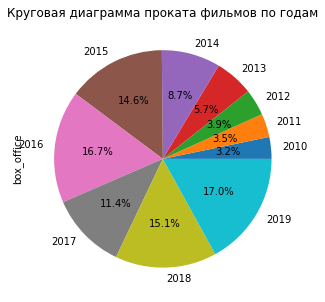

In [57]:
box_office_per_year.plot(y = 'count', kind='pie', figsize=(5, 5), autopct='%1.1f%%')
plt.title('Круговая диаграмма проката фильмов по годам')
plt.show()

На данной диаграмме видно, что для прокатных наиболее полно представлен период за 2019 год (17%), затем 2016 г (16.7%) и 2018 г (15.1%). Самое меньшее количество фильмов, показанных в кинотеатрах, было в 2010 г (3.2%).

**2. Доля фильмов с кассовыми сборами** 

Также сгруппируем количество всех фильмов в таблице с годом премьеры.

In [58]:
movies_per_year = ru_release.groupby('year_of_premiere')['title'].count()

Подсчитаем процентное соотношение фильмов со сборами к общему числу фильмов:

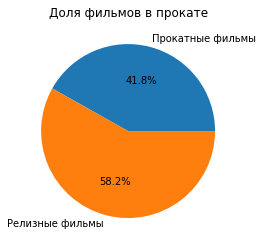

In [59]:
part_box = box_office_per_year.sum() * 100 / movies_per_year.sum()
part_release = 100 - part_box

# Построим диаграмму по количеству фильмов с прокатом и без.

labels = 'Прокатные фильмы', 'Релизные фильмы'
sizes = [part_box, part_release]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Доля фильмов в прокате')
plt.show()

Ранее, при подсчете пропусков, мы уже упоминали, что фильмов, побывавших в прокате в кинотеатрах около 42% от общего числа. 

**Таким образом**, эта гипотеза подтвердилась и мы имеем менее половины данных, в которых имеется информация о кассовых сборах. 

**3. Динамика соотношения прокатных фильмов к общему числу фильмов по годам** 

Построим совместную столбчатую гистограмму для всех фильмов и фильмов со сборами.

In [60]:
pivot = ru_release[(ru_release['box_office'] > 0)].pivot_table(
    index='year_of_premiere', 
    values='box_office', 
    aggfunc= 'count')

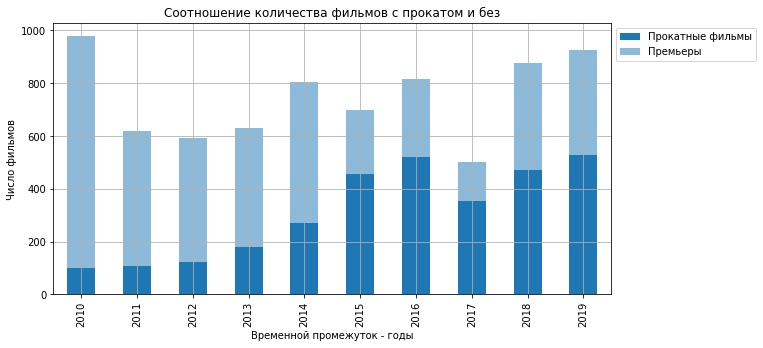

In [61]:
box_office_per_year.plot(x='year_of_premiere', 
                         label='Прокатные фильмы',
                         kind='bar', figsize=(10,5), grid = True,
                         alpha = 1)

movies_per_year.plot(x='year_of_premiere',  
                     label = 'Премьеры',
                     kind='bar', figsize=(10,5), grid = True,
                     alpha = 0.5)


plt.title('Соотношение количества фильмов с прокатом и без')
plt.ylabel('Число фильмов')
plt.xlabel('Временной промежуток - годы')
plt.legend()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

На гистограмме отчетливо видно погодовое соотношение количества проката к премьерам. Мы видим, как с 2013 г начинается плавный рост числа фильмов в прокате, однако, 2017 г проседает. 

**Таким образом**, мы видим что на момент 2010 г у нас почти в 10 раз меньше прокатных фильмов по сравнению с количеством премьер. С 2015 г поменялось соотношение премьер и проката - более половина всех премьер была показана в российских кинотеатрах. В период с 2018 г по 2019 г фильмы в прокате составляют половину от премьер.

**4. Минимальные и максимальные суммы сборов по годам**

Сгруппируем фильмы с прокатом и годом премьеры, а также подсчитаем общие суммы сборов по годам.

In [62]:
sum_box_office_per_year = ru_release[(ru_release['box_office'] > 0)].groupby('year_of_premiere')['box_office'].sum()
sum_box_office_per_year

year_of_premiere
2010        2,428,654.00
2011       14,102,765.00
2012        6,911,073.00
2013       29,799,706.20
2014    7,434,717,843.10
2015   38,527,827,199.09
2016   46,742,121,742.48
2017   48,458,147,253.75
2018   49,251,950,180.20
2019   48,278,101,953.08
Name: box_office, dtype: float64

Построим график, на котором будет изображена динамика сборов в зависимоти от года выхода фильма.

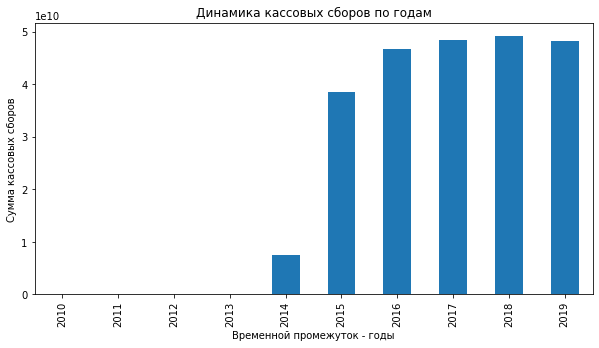

In [63]:
sum_box_office_per_year.plot(x='year_of_premiere', 
                             kind='bar', figsize=(10,5))

plt.title('Динамика кассовых сборов по годам')

plt.ylabel('Сумма кассовых сборов')
plt.xlabel('Временной промежуток - годы')
plt.show()

По гистограмме мы можем определить, как со временем менялись сборы в кинотеатрах.

**Таким образом**, самая минимальная сумма сборов была в 2010 г и составляла 2,4 млн руб, а самая максимальная - 2018 г (49,3 млрд руб). В целом, резкий рост сумм сборов начался в 2014 г (до 7.4 млрд руб ), а далее в 2015 г еще больше - 38 млрд руб. Учитывая, что в 2017 г количество прокатов меньше, чем в 2016 г и 2018 г, по суммам он не сильно им уступает (48,5 млрд руб).

**5. Рассчитать среднюю и медианную сумму сборов для каждого года.**


In [64]:
avg_median_box_office_per_year = ru_release[(ru_release['box_office'] > 0)].groupby('year_of_premiere').agg({'box_office': ['count', 'mean', 'median', 'max', 'min']})
avg_median_box_office_per_year

box_office                                               \
                      count           mean       median              max   
year_of_premiere                                                           
2010                    101      24,046.08     1,710.00     1,446,400.00   
2011                    109     129,383.17     3,000.00    11,618,085.00   
2012                    122      56,648.14     6,110.00     2,311,220.00   
2013                    179     166,478.81     3,580.00    19,957,031.50   
2014                    272  27,333,521.48    20,310.00 1,016,410,635.30   
2015                    456  84,490,849.12 4,864,744.05 1,658,861,425.50   
2016                    521  89,716,164.57 3,778,317.80 2,048,126,108.00   
2017                    355 136,501,823.25 9,919,415.00 2,779,686,144.00   
2018                    470 104,791,383.36 8,821,498.98 2,271,754,004.52   
2019                    529  91,262,952.65 4,601,033.60 3,073,568,690.79   

                            
                       min  
year_of_premiere            
2010                 75.00  
2011                125.00  
2012                 80.00  
2013                 40.00  
2014                 50.00  
2015                100.00  
2016                200.00  
2017              7,900.00  
2018             42,469.00  
2019              4,398.40

Мы видим, как со временем увеличилось не только количество фильмов, показанных в кинотеатрах, но и медианная и средняя суммы сборов.

Но стоит обратить внимание на то, как в 2017 г (количество прокатов там меньше, чем в 2015-2016 гг и 2018-2019 гг), увеличилась медианная и средняя стоимости билетов!

Построим гистограммы, чтобы зрительно оценить результат рассчетов:

In [65]:
avg_box_office_per_year = ru_release[(ru_release['box_office'] > 0)].groupby('year_of_premiere')['box_office'].mean()
median_box_office_per_year =  ru_release[(ru_release['box_office'] > 0)].groupby('year_of_premiere')['box_office'].median()

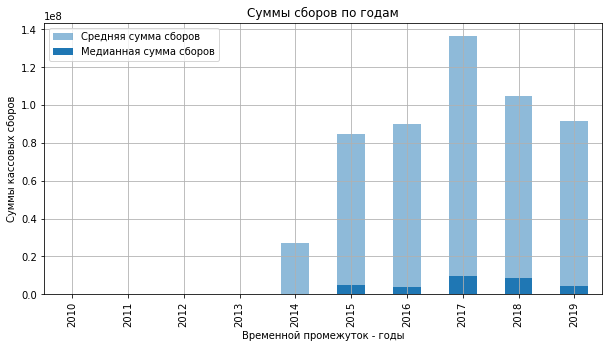

In [66]:
avg_box_office_per_year.plot(x='year_of_premiere', 
                         label='Средняя сумма сборов',
                         kind='bar', figsize=(10,5), grid = True,
                         alpha = 0.5)

median_box_office_per_year.plot(x='year_of_premiere',  
                     label = 'Медианная сумма сборов', grid = True,
                     kind='bar', figsize=(10,5),
                     alpha = 1)


plt.title('Суммы сборов по годам')
plt.legend()
plt.ylabel('Суммы кассовых сборов')
plt.xlabel('Временной промежуток - годы')
plt.show()

**Действительно**, эта гистограмма отлична от предыдущих тем, что на ней 2017 г является лидером по средней сумме сборов, хотя как мы помним, за тот год было меньше показов, чем в 2016 г и 2018 г. То же касается и медианной суммы сборов за этот год. 

Средняя сумма сборов, показанная на этом графике во много раз превышает медианную стоимость, поскольку в каждый год у нас встречается и слишком большие суммы сборов за фильм, и слишком маленькие. Например, за один только 2017 г в кинотеатрах было показано 355 фильмов, у которых разница в минимальной и максимальной сумме сбора 7 тр и 2,7 млрд. Соответственно, вместе с разницей в суммах сборов и числом прокатов есть неравномерность. На этом графике средняя сумма сбора ближе к максимальной, чем к медианной. 

Медианные стоимости так сильно отличаются от средней, потому что так высчитывается блок более однородных данных.

**6. Влияние возрастного рейтинга на сборы фильмов в прокате за период 2015-2019 гг.**

Определите, фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Создадим сводную таблицу по году проката, сборам и возрастному ограничению. Также зададим условие, что нам нужны только строки с 2015 г показа и далее.

In [67]:
data_pivot = ru_release.query('year_of_premiere >= 2015 and box_office > 0').pivot_table(
    index='year_of_premiere', 
    columns='age_restriction', 
    values='box_office', 
    aggfunc='sum')

data_pivot

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_of_premiere,,,,,
2015,"379,054,578.37","13,419,509,570.51","10,781,600,601.27","5,430,350,628.93","8,517,311,820.01"
2016,"150,034,321.67","11,150,762,103.96","16,594,249,489.74","6,793,929,818.87","12,053,146,008.24"
2017,"229,598,930.00","7,851,427,660.67","18,694,590,951.06","9,651,495,581.02","12,031,034,131.00"
2018,"32,449,002.11","14,267,250,435.69","16,278,405,946.93","8,760,085,501.15","9,913,759,294.32"
2019,"17,746,066.82","12,680,198,773.67","12,753,418,984.60","10,121,796,303.64","12,704,941,824.35"


Много цифр, а мы любим смотреть на картинки, там все понятнее. Построим график по сводной таблице.

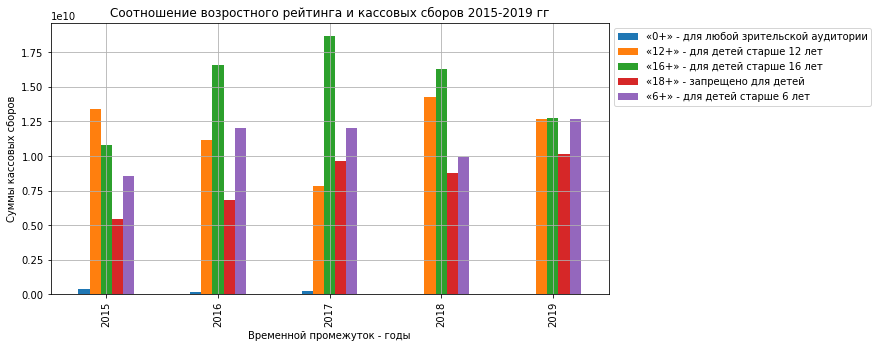

In [68]:
data_pivot.plot(kind='bar', figsize=(10,5), grid = True)

plt.title('Соотношение возростного рейтинга и кассовых сборов 2015-2019 гг')

# Размещение легенды вне графика я подсмотрела в интернетах, 
# мне она мешала, а в теории об этом не говорилось :)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('Суммы кассовых сборов')
plt.xlabel('Временной промежуток - годы')
plt.show()

**Влияние возростных ограничений на сборы 2015-2019 гг** 

Сразу можно сделать несколько выводов, глядя на такой график:
1. фильмы с возрастной категорией '0+' либо были не особо широко представлены в прокате, либо на них просто мало кто ходил - у таких фильмов во все года сборы минимальны.
2. фильмы '18+' имеют тенденцию к увеличению сборов со временем. Правда в 2018 г сборы таких фильмов немного провисли. Возможно потому, что качество фильмов ужасов начало падать, или потому что малая группа ценителей решилась посмотреть финальную часть '50 оттенков серого'. А вот в 2019 г на финал 'Мстителей' собралось людей побольше.
3. такой же провал в 2018 г мы видим и для фильмов и мультфильмов с рейтингом '6+', хотя в общем-то соблюдается рост кассовых сборов.
4. фильмы с рейтингом '12+' на протяжении выбранных нами для исследований лет не имеют стабильного роста или падения кассовых сборов, однако, нам отчетливо видно резкое снижение сборов в 2017 г. Максимальные же сборы в этой категории были в 2018 г.
5. к фильмам с рейтингом '16+' с 2015 г по 2017 г зрители испытывали интерес, но затем этот интерес стал снижаться. Тем не менее такие фильмы лидируют по сбором в 2016-2018 гг.

Как итог, можно выделить ярких лидеров по каждому году:

- 2015 г - фильмы с рейтингом «12+» - для детей старше 12 лет;
- 2016 г - фильмы с рейтингом «16+» - для детей старше 16 лет;
- 2017 г - фильмы с рейтингом «16+» - для детей старше 16 лет;
- 2018 г - фильмы с рейтингом «16+» - для детей старше 16 лет;
- 2019 г - фильмы с рейтингом «6+» - для детей старше 6 лет.

В противоположность им самыми некассовыми фильмами являются те, у которых жанр «18+» - запрещено для детей и «0+» - для любой зрительской аудитории

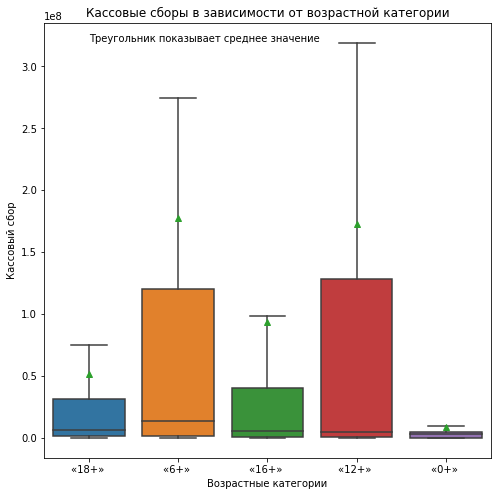

In [69]:
# Комментарий ревьюера 2
import seaborn as sns
temp = ru_release.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['year_of_premiere'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

**Таким образом** мы выполнили *третий этап* работы по исследовательскому анализу данных.

- Рассчитали количество фильмов, выходивших в прокат каждый год.

Для прокатных фильмов наиболее полно представлен период за 2019 год (17%), затем 2016 г (16.7%) и 2018 г (15.1%). Самое меньшее количество фильмов, показанных в кинотеатрах, было в 2010 г (3.2%).

- Рассчитали долю фильмов, побывавших в прокате в кинотеатрах.

42.3% от общего числа.

- Выявили динамику соотношения прокатных фильмов к общему числу фильмов по годам.

В 2010 г прокатов было в 10 раз меньше, чем премьер. С 2013 по 2017 г был рост числа фильмов в прокате. С 2015 г  более половины всех премьер была показана в российских кинотеатрах. Далее эта тенденция продолжается, количество прокатов растет.

- Выявили, как менялась динамика сумм сборов по годам. 

Самая минимальная сумма сборов была в 2010 г и составляла 2,4 млн руб, а самая максимальная - 2018 г (49,3 млрд руб). В целом, резкий рост сумм сборов начался в 2014 г (до 7.4 млрд руб ), а далее в 2015 г еще больше - 38 млрд руб. Учитывая, что в 2017 г количество прокатов меньше, чем в 2016 г и 2018 г, по суммам он не сильно им уступает (48,5 млрд руб).

- Рассчитали среднюю и медианную суммы сбора у прокатных фильмов.

Средняя сумма сбора ближе к максимальной, чем к медианной. Медианные стоимости так сильно отличаются от средней, потому что так высчитывается блок более однородных данных.

- Влияние возрастного рейтинга на сборы фильмов в прокате за период 2015-2019 гг

Самые кассовые фильмы с рейтингом «16+» (2016-2018 гг), затем фильмы с рейтингом «6+» (лидируют в 2019 г) и фильмы с рейтингом «12+» (в 2015 г). Самыми некассовыми фильмами являются те, у которых рейтинг «18+» и «0+» (в каждом году по ним меньше всего сборов).

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

**1. Процентное соотношение госпомощи**

Также узнаем процентное соотношение возвращаемых средств и невозвращаемых средств к общему бюджету фильмов.

Рассчитаем процент общей суммы возвращаемых средств к бюджету:

In [70]:
percent_ref = ru_release['refundable_support'].sum() * 100 / ru_release['budget'].sum()
percent_ref

8.652881128348618

Теперь рассчитаем процент общей суммы невозвращаемых средств к бюджету:

In [71]:
percent_nonref = ru_release['nonrefundable_support'].sum() * 100 / ru_release['budget'].sum()
percent_nonref

35.87505549535077

Подсчитаем, какая доля остается в бюджете без господдержки

In [72]:
part_budget = 100 - percent_ref - percent_nonref

А теперь составим круговую гистограмму для визуализации расчетов по всей таблице.

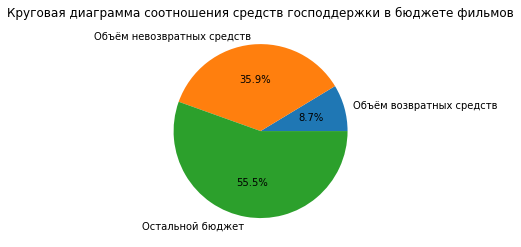

In [73]:
labels = 'Объём возвратных средств', 'Объём невозвратных средств', 'Остальной бюджет'
sizes = [percent_ref, percent_nonref, part_budget]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Круговая диаграмма соотношения средств господдержки в бюджете фильмов')
plt.show()

**В итоге** 35,9% от бюджета фильма занимают средства госпомощи, не требующие возвращения источнику финансирования. Более 50% суммы бюджета приходятся на средства продюссеров и частных инвесторов. Менее 10% суммы госпомощи источник финансирования все же требует вернуть.

**2. Процентное соотношение источников госпомощи**

Сгруппируем источники и бюджет. Так мы сможем узнать количество профинансированных фильмов и каким источником.

In [74]:
print('Всего строк:', ru_release['financing_source'].count())
group_financing_source = ru_release.loc[ru_release['financing_source'] != 'нет'].groupby('financing_source')['budget'].count()
group_financing_source

# Исключим из диаграммы те строки, в которых нет источников финансирования

Всего строк: 7442


financing_source
Министерство культуры               163
Министерство культуры, Фонд кино     21
Фонд кино                           131
Name: budget, dtype: int64

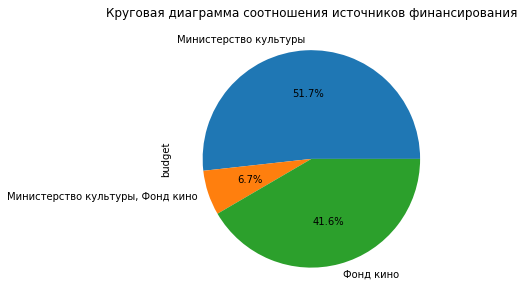

In [75]:
group_financing_source.plot(y = 'count', kind='pie', figsize=(5, 5), autopct='%1.1f%%')
plt.title('Круговая диаграмма соотношения источников финансирования')
plt.show()

На диаграмме видно, что 51.7% от всех фильмов, получивших госпомощь, получили ее от Минкульта. 41% фильмов госпомощь получили от Фонда кино.

**3. Процентное соотношение сумм, переданных источникам господдерки**

Мы выяснили, что чаще всего фильмы финансирует Минкульт, а вот кто из источников не скупится на средства?

In [76]:
group_financing_source2 = ru_release.loc[ru_release['financing_source'] != 'нет'].groupby('financing_source')['budget'].sum()
group_financing_source2

financing_source
Министерство культуры              11,469,203,758.00
Министерство культуры, Фонд кино    2,626,309,609.00
Фонд кино                          28,144,752,572.00
Name: budget, dtype: float64

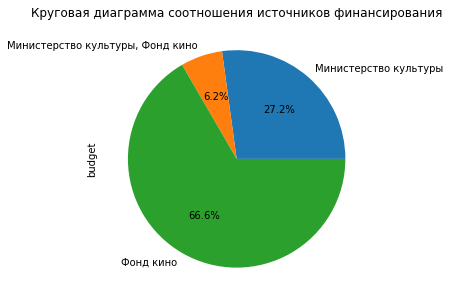

In [77]:
group_financing_source2.plot(y = 'sum', kind='pie', figsize=(5, 5), autopct='%1.1f%%')
plt.title('Круговая диаграмма соотношения источников финансирования')
plt.show()

Хоть Минкульт и финансирует почти 50% фильмов, но Фонд кино предлагает 66,6% от всех средств господдержки. 

**4. Соотношение бюджета и количества фильмов с господдержкой по годам**.

Сначала узнаем, есть ли какая-нибудь зависимость количества фильмов с госбюджетом от года их премьеры.

In [78]:
count_budget_per_year = ru_release[(ru_release['budget'] > 0)].groupby('year_of_premiere')['budget'].count()
count_budget_per_year

year_of_premiere
2013     2
2014    15
2015    80
2016    58
2017    39
2018    52
2019    69
Name: budget, dtype: int64

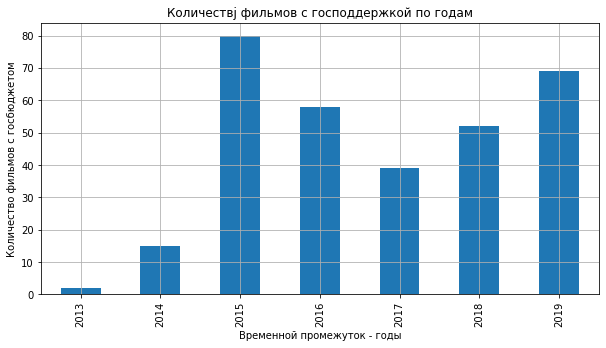

In [79]:
count_budget_per_year.plot(x='year_of_premiere', kind='bar', figsize=(10,5), grid = True)

plt.title('Количествj фильмов с господдержкой по годам')

plt.ylabel('Количество фильмов с госбюджетом')
plt.xlabel('Временной промежуток - годы')
plt.show()

На графике видно, как со временем поменялось количество фильмов, которые получили от государства финансирование. В 2015 г таких фильмов было больше всего - 80, меньше всего - в 2013 г (2). Данных о госфинансировании фильмов за 2010-2011 гг нет. С 2015 г по  2017 г отражено снижение фильмов с госфинансированием. Затем, после 2017 г идет увеличение количества фильмов, финансируемых государством. 

Что касается сумм бюджетов таких фильмов, то это мы сейчас узнаем.

In [80]:
sum_budget_per_year = ru_release[(ru_release['budget'] > 0)].groupby('year_of_premiere')['budget'].sum()
sum_budget_per_year

year_of_premiere
2013      255,435,390.00
2014    1,279,484,783.00
2015    7,309,669,207.00
2016    7,228,942,748.00
2017    6,972,172,568.00
2018    6,651,694,634.00
2019   12,542,866,609.00
Name: budget, dtype: float64

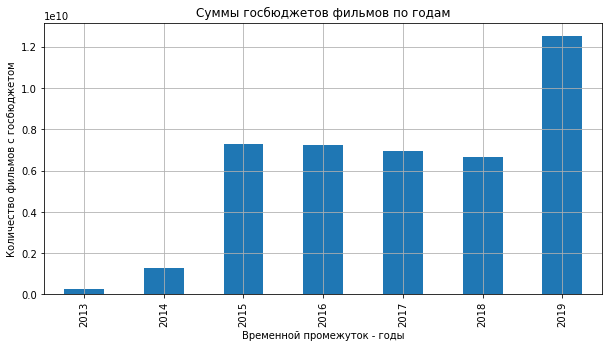

In [81]:
sum_budget_per_year.plot(x='year_of_premiere', kind='bar', figsize=(10,5), grid = True)

plt.title('Суммы госбюджетов фильмов по годам')

plt.ylabel('Количество фильмов с госбюджетом')
plt.xlabel('Временной промежуток - годы')
plt.show()

На данном графике отображено то, как финансирование фильмов государством увеличивается. После 2014 г наблюдается резкий рост бюджетных сумм с 1.2 до 7.3 млрд руб. С 2015 г по 2018 г наблюдается постепенное уменьшение финансирования фильмов с 7.3 до 6.6 млрд руб. Сумма госпомощи в 2019г превышает 12 млрд р. 

**5. Рейтинги фильмов с господдержкой**

Нужно найти, есть ли зависимость рейтингами фильмов и финансированием со стороны государства.

In [82]:
# Будем строить гистограмму по тем фильмам, где бюджет есть, то есть он > 0

ratings_support = ru_release.query('budget > 0').groupby('ratings')['budget'].count()

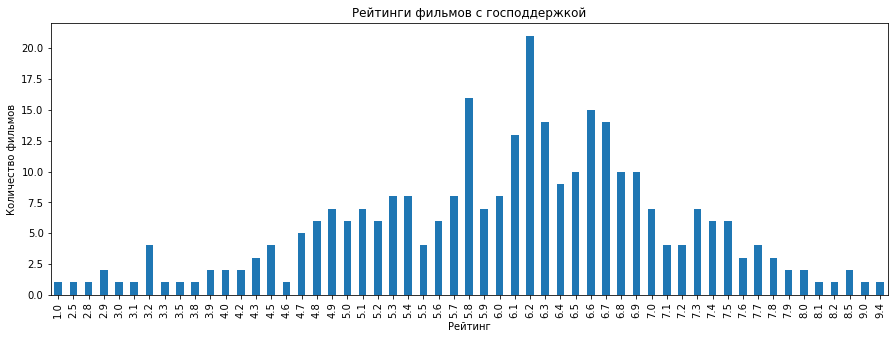

In [83]:
ratings_support.plot(kind='bar', figsize=(15,5))

plt.title('Рейтинги фильмов с господдержкой')
plt.ylabel('Количество фильмов')
plt.xlabel('Рейтинг')
plt.show()

Сразу заметно, что у фильмов с господдержкой есть и низкие, и высокие рейтинги. Более 20 фильмов имеют рейтинги 5.8 и более 15 - 6.2. На основную массу фильмов приходятся рейтинги в среднем от 5 до 8.

**Таким образом**, фильмы с государственным финансированием могут быть по-разному оценены зрителями, но в большинстве случаев средне и хорошо.

**6. Окупаемость фильмов с государственной поддержкой**

Есть ли зависимость между суммой государственных вложений и суммой сборов? Нужно узнать, влияет ли господдержка на сумму сборов.

Создадим столбец, в котором будет разница сумм между вложениями и сборами. Также я решила отследить по годам динамику окупаемости.

In [84]:
ru_release['profit'] = ru_release['box_office'] - ru_release['budget']

Далее создаем сводные таблицы по столбцу с бюджетом и столбцу с доходом/убытком. Мне стало интересно также посмотреть на те фильмы, где 100% есть источник финансирования и есть сборы.

In [100]:
data_pivot1 = ru_release.query('budget > 0 and box_office > 0').pivot_table(
    index='year_of_premiere',
    columns='financing_source', 
    values='budget', 
    aggfunc='sum')

data_pivot2 = ru_release.query('budget > 0 and box_office > 0').pivot_table(
    index='year_of_premiere',
    columns='financing_source', 
    values='profit', 
    aggfunc='sum')


Построим гистограммы по этим таблицам.

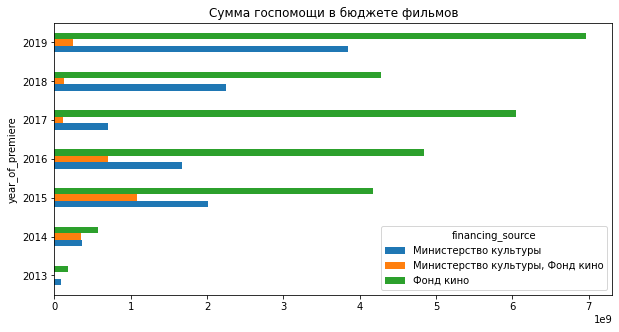

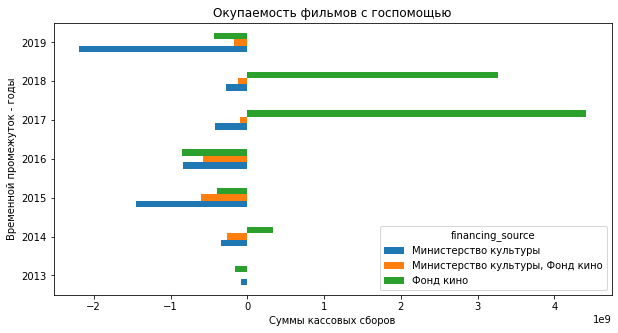

In [86]:
data_pivot1.plot(kind='barh', figsize=(10,5))

plt.title('Сумма госпомощи в бюджете фильмов')

data_pivot2.plot(kind='barh', figsize=(10,5))

plt.title('Окупаемость фильмов с госпомощью')
plt.ylabel('Временной промежуток - годы')
plt.xlabel('Суммы кассовых сборов')
plt.show()

По таким графикам сразу видно, что:
1. В 2013 г Минкульт и Фонд кино по отдельности спонсировали фильмы, но вместе нет. Также, судя по приблизительно одинаковым столбцам, которые направлены в противоположную сторону, мы можем сказать, что эти фильмы неокупились.
2. В 2014 г подключается совместное финансирование фильмов и Минкультом, и ФК. Суммы, вложенные в бюджеты фильмов ФК, превышают суммы Минкульта и совместных. На второй гистограмме видно, что фильмы, спродюссированные ФК окупились.
3. В 2015 г финансирования всех трех видов значительно увеличиваются, но снова ФК окупился. Ну как сказать, окупились.. Хотя бы часть средств отбили.
4. В 2016 г Минкульт и совместное финансирование уменьшилось, лидируют ФК.  небольшом плюсе снова ФК.
5. В 2017 г происходит невероятное: ФК вложился в достаточно успешные фильмы, в отличие от своих коллег из Минкульта.
6. В 2018 г сохраняется тенденция на рост доходов. Минкульт потерял относительно придыдущего года не так много.
7. В 2019 г картина абсолютно меняется и уже все сидят в убытках.

In [87]:
# сгруппируем все строки по бюджету, сборам и итогам
source_budget = ru_release.query('financing_source != "нет"').groupby('financing_source')['budget'].sum()
source_box_office = ru_release.query('financing_source != "нет"').groupby('financing_source')['box_office'].sum()

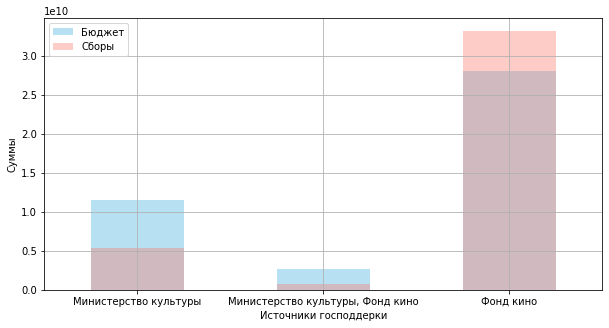

In [88]:
source_budget.plot(kind='bar', figsize=(10,5), 
                   color = 'skyblue', alpha = 0.6, 
                   grid = True, label = 'Бюджет')
source_box_office.plot(kind='bar', figsize=(10,5), 
                       color = 'salmon', alpha = 0.4, 
                       grid = True, label = 'Сборы')
plt.xticks(rotation=0)

plt.legend()
plt.ylabel('Суммы')
plt.xlabel('Источники господдерки')
plt.show()

Это общая гистограмма за все года наблюдений: тут мы видим, что ФК не только вкладывает больше сумм на развитие отечественного кинематографа, но и получает с этого прибыль.

А вот по столбцам Минкульта и совместного проекта финансирования можно увидить явный отрицательный 'рост' финансовых вложений. Бюджеты явно превышают кассовые сборы.

**Таким образом** мы выполнили *четвертый и последний этап* работы по исследовнию фильмов, которые получили государственную поддержку.

-  Процентное соотношение объема госпомощи

Более 50% суммы бюджета приходятся на средства продюссеров и частных инвесторов. Менее 10% суммы госпомощи источник финансирования все же требует вернуть.

- Процентное соотношение источников госпомощи

Практически 50% от всех фильмов, получивших госпомощь, получили ее от Минкульта. 41.6% фильмов госпомощь получили от Фонда кино.

- Процентное соотношение сумм, переданных источникам господдерки

Фонд кино предлагает 66,6% от всех средств господдержки. 27.2% от числа всех госпомощи отчисляются фильмам от Министерства культуры

- Соотношение бюджета и количества фильмов с господдержкой по годам

Данных о госфинансировании фильмов за 2010-2011 гг нет. Количество фиильмов и финансирование государством увеличивается со временем. После 2017 г идет увеличение количества фильмов, финансируемых государством. Сумма госпомощи в 2019г превышает 12 млрд р. 

- Рейтинги фильмов с господдержкой

У фильмов с господдержкой есть и низкие, и высокие рейтинги. Более 20 фильмов имеют рейтинги 5.8 и более 15 - 6.2. На основную массу фильмов приходятся рейтинги в среднем от 5 до 8. Фильмы с государственным финансированием могут быть по-разному оценены зрителями, но в большинстве случаев средне и хорошо.

- Окупаемость фильмов с государственной поддержкой

С течением времени все источники госпомощи увеличивали отчисления в бюджеты фильмов, однако ФК не только вкладывает больше сумм на развитие отечественного кинематографа, но и получает с этого прибыль.
А вот Министерство культуры и совместный проект финансирования явно испытывают профицит средств после неудачных показов фильмов в кионотеатрах. Бюджеты явно превышают кассовые сборы.

### Шаг 5. Напишите общий вывод

***Объектом*** исследования был портал открытых данных Министерства культуры. 

***Целью*** исследования было изучение рынка российского кинопроката. 

В ***задачи*** исследования входили:
- проведение анализа данных,
- выявление текущих трендов,
- установление заинтересованности зрителей в фильмах с государственной поддержкой. 

В ходе работы было выполнено несколько шагов анализа исходного массива данных:

1. **изучить общую информацию БД**

Набор данных содержал информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

- импортировали необходимые для работы библиотеки,
- загрузили исходные таблицы и нашли у них одинаковый столбец и объединили их по столбцу с номерами прокатных удостоверений

2. **провести предобработку данных**

Во множестве строк оказались пропущенные значения, тип данных в некоторых столбцах не соответствовал действительной информации, а также встречались дубликаты. 

1) Проверили типы данных в датафрейме и преобразовали их.

- в столбце show_start_date изменили строковый формат на формат даты,
- в столбце ratings нашли и заменили все значения со 100 балльной системы методом replace() на 10 балльную и поменяли строковые данные на вещественные методом .astype('float64').

2) Изучили пропуски в датафрейме. 

- Для поиска пропущенных значений был применен метод .isna().sum()). Наибольшее количество пропущенных значений было в толбцах refundable_support (96%), nonrefundable_support (96%), budget (96%), financing_source (96%) и box_office (58%).
- В столбцах film_studio, production_country, director удалили пропуски, поскольку таких строк менее 1%.
- В столбцах producer, ratings, genres решили оставить пропуски, потому что по большей части они не влияют на исследование.
- В столбцах refundable_support, nonrefundable_support, budget, financing_source, box_office заполнили пропуски 0 и 'нет'.

3) Проверили, есть ли в данных дубликаты. 

- Для выявления явных дубликатов применили методы .duplicated().sum().
- Дубликаты по номеру прокатного удостоверения у нас в датафрейме есть, но это данные с сайта Минкульта, заменить там мы ничего не можем.
- В столбцах financing_source и age_restriction неявных дубликатов не найдено.

4) Изучили столбцы, которые содержат категориальные значения.

- Выявили в столбце type продублированных значения типа фильма из-за появления пробелов в начале строки.
- Исправили этот момент методами .str.lower() и .str.strip()

5) Изучили столбцы, которые хранят количественные значения.

- Обнаружили такие данные, когда при нулевом бюджете у 17 фильмов есть источник госфинансирования (хотя наличие нулевой записи в этом столбце гарантирует отсутствие госфинансирования).
- Создали переменную, в которой числятся подозрительные бюджеты.

6) Добавили новые столбцы.

- Создали столбец с информацией о годе проката, выделив год из даты премьеры фильма методом .dt.year.
- Создайте столбец с основным жанром фильма.  
- Создали столбец с именем и фамилией главного режиссера.

Создали функцию, в которой указали, что если в строке более есть элементы, разделенных запятой, то нужно вывести только первый такой элемент (а точнее он будет иметь индекс положения 0). Применили ее к обоим столбцам.

- Создали столбец с долей господдержки от общего бюджета фильма.

Посчитали процентное соотношение суммы возврата и невозврата к общему бюджету.

3. **провести исследовательский анализ**

- Рассчитали долю фильмов с кассовыми сборами.

Фильмов, побывавших в прокате в кинотеатрах - 42.3% от общего числа.

- Выявили динамику соотношения прокатных фильмов по годам.

В 2010 г прокатов было в 10 раз меньше, чем премьер. С 2013 по 2017 г был рост числа фильмов в прокате. С 2015 г  более половины всех премьер была показана в российских кинотеатрах. Далее эта тенденция продолжается, количество прокатов растет.

- Выявили, какой период полнее всего представлен в данных.

С 2010 г по 2016 г произошел рост числа прокатов с 3.3% до 16.6%. Затем в 2017 г количество прокатов снижается до 11.3%. И потом возвращается тенденция на рост показов фильмов в кинотеатрах. 

- Выявили, как менялась динамика сумм сборов по годам. 

Самая минимальная сумма сборов была в 2010 г и составляла 2,4 млн руб, а самая максимальная - 2018 г (49,6 млрд руб). В целом, резкий рост сумм сборов начался в 2014 г (до 7 млрд руб ), а далее в 2015 г еще больше - 39,млрд руб. Учитывая, что в 2017 г количество прокатов меньше, чем в 2016 г и 2018 г, по суммам он не сильно им уступает (48,5 млрд руб).

- Посчитали среднюю и медианную сумму сборов для каждого года.

Со временем увеличилось не только количество фильмов, показанных в кинотеатрах, но и медианная и средняя суммы сборов. В 2017 г (количество прокатов там меньше, чем в 2015-2016 гг и 2018-2019 гг), увеличилась медианная и средняя стоимости билетов.

- Определили влияние возрастного ограничения аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? 

Самые кассовые фильмы с рейтингом «16+» (2016-2018 гг), затем фильмы с рейтингом «6+» (лидируют в 2019 г) и фильмы с рейтингом «12+» (в 2015 г). Самыми некассовыми фильмами являются те, у которых рейтинг «18+» и «0+» (в каждом году по ним меньше всего сборов).

4. **исследование фильмов с государственной поддержкой**

-  Процентное соотношение объема госпомощи

Узнали соотношение возвращаемых средств и невозвращаемых средств к общему бюджету фильмов. 38,5% от бюджета фильма занимают средства госпомощи, не требующие возвращения источнику финансирования. Более 50% суммы бюджета приходятся на средства продюссеров и частных инвесторов. Менее 10% суммы госпомощи источник финансирования все же требует вернуть

- Процентное соотношение источников госпомощи

Практически 50% от всех фильмов, получивших госпомощь, получили ее от Минкульта. 44% фильмов госпомощь получили от Фонда кино.

- Процентное соотношение сумм, переданных источникам господдерки

Фонд кино предлагает 66,6% от всех средств господдержки. 27.2% от числа всех госпомощи отчисляются фильмам от Министерства культуры

- Соотношение бюджета и количества фильмов с господдержкой по годам

Данных о госфинансировании фильмов за 2010-2011 гг нет. 

Финансирование фильмов государством увеличивается. После 2014 г наблюдается резкий рост бюджетных сумм с 1.2 до 7.3 млрд руб. С 2015 г по 2018 г наблюдается постепенное уменьшение финансирования фильмов с 7.3 до 6.6 млрд руб. Сумма госпомощи в 2019г превышает 12 млрд р. 

В 2015 г таких фильмов было больше всего - 80, меньше всего - в 2013 г (2). С 2015 г по  2017 г отражено снижение фильмов с госфинансированием. Затем, после 2017 г идет увеличение количества фильмов, финансируемых государством. 

- Рейтинги фильмов с господдержкой

У фильмов с господдержкой есть и низкие, и высокие рейтинги. Более 20 фильмов имеют рейтинги 5.8 и более 15 - 6.2. На основную массу фильмов приходятся рейтинги в среднем от 5 до 8. Фильмы с государственным финансированием могут быть по-разному оценены зрителями, но в большинстве случаев средне и хорошо.

- Окупаемость фильмов с государственной поддержкой

С течением времени все источники госпомощи увеличивали отчисления в бюджеты фильмов, однако ФК не только вкладывает больше сумм на развитие отечественного кинематографа, но и получает с этого прибыль.
А вот Министерство культуры и совместный проект финансирования явно испытывают профицит средств после неудачных показов фильмов в кионотеатрах. Бюджеты явно превышают кассовые сборы.

***В результате исследования рынка российского кинопроката можно выявить такие тренды***:

1. Менее половины фильмов из датафрейма были показаны в кинотеатрах, однако есть тенденция к увеличению числа прокатов.
2. Суммы сборов со временем только росли.
3. В основном, российские зрители предпочитают фильмы с рейтингом «16+» и «6+». Фильмы с рейтингом «18+» и «0+» в кинотеатрах смотрят реже всего.

Что касается государственного финансирования производства отечественных фильмов, то можно выделить такие итоги:

1. Более 50% от затрат на продакшн идет от частных инвесторов и продюссеров. Почти 40% от средств госпомощи Минкульт и ФК не требуют к возвращению.
2. Чаще всего финансириванием фильмов занимается Министерство культуры (в 50% случаев), а затем уже Фонд кино.
3. В свою очередь Фонд кино поставляет на производство большие суммы, чем Минкульт (66% против 27%).
4. В 2015 г произошел резкий рост количества фильмов, финансируемых государством. Это так же касается и сумм госбюджета. В 2018 г после снижения количества премьер, возросло финансирование российских фильмов.
5. По качеству фильмы, которые получили государственные субсидии на производство, оцениваются зрителями как средние и периодически как хорошие (5-8 баллов на Кинопоиске).
6. Сумма финансовых вложенний от Минкульта и ФК в кинопроизводство не покрывается кассовыми сборами. Зачастую фильмы не окупаются. Фонд кино еще более-менее может вернуть хотя бы часть средств, в отличие от Министерства культуры.